# Formula 1 Driver Performance Analysis (1950-2024)

## Summary

This notebook provides a comprehensive analysis of Formula 1 driver performance using historical race data spanning from 1950 to 2024. The analysis examines key performance metrics, reliability trends, and era comparisons to answer critical questions about driver and team performance in Formula 1.

### Analysis Areas:
1. **Top Performers Analysis** - Identifying the most successful drivers by total points
2. **Team Efficiency Analysis** - Measuring constructor efficiency through points per race
3. **Reliability Analysis** - Examining DNF rates and failure patterns across decades
4. **Performance Consistency** - Analyzing drivers who maximize or minimize their starting positions
5. **Era Comparison** - Comparing performance metrics across different F1 eras

### Data Sources:
- **results.csv**: Race results data (26,759 rows)
- **races.csv**: Race information and metadata (1,125 rows) 
- **status.csv**: Race outcome status codes (139 rows)


## 1. Data Loading and Setup

First, we'll import necessary libraries and load our datasets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from scipy import stats
import math

warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")



In [2]:
print("Loading Formula 1 datasets")
print("="*50)

results_df = pd.read_csv('results.csv')
races_df = pd.read_csv('races.csv')
status_df = pd.read_csv('status.csv')

print(f"✓ Results dataset loaded: {results_df.shape[0]:,} rows, {results_df.shape[1]} columns")
print(f"✓ Races dataset loaded: {races_df.shape[0]:,} rows, {races_df.shape[1]} columns")
print(f"✓ Status dataset loaded: {status_df.shape[0]:,} rows, {status_df.shape[1]} columns")


Loading Formula 1 datasets
✓ Results dataset loaded: 26,759 rows, 18 columns
✓ Races dataset loaded: 1,125 rows, 18 columns
✓ Status dataset loaded: 139 rows, 2 columns


## 2. Data Exploration and Understanding

Let's examine the structure and content of our datasets to understand what we're working with.

In [3]:
print("RESULTS DATASET OVERVIEW")
print("="*40)
print(f"Shape: {results_df.shape}")
print(f"Columns: {list(results_df.columns)}")
print(f"\nData Types:")
print(results_df.dtypes)
print(f"\nMissing Values:")
print(results_df.isnull().sum())
print(f"\nFirst 5 rows:")
display(results_df.head())

RESULTS DATASET OVERVIEW
Shape: (26759, 18)
Columns: ['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid', 'position', 'positionText', 'positionOrder', 'points', 'laps', 'time', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed', 'statusId']

Data Types:
resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number              object
grid                 int64
position            object
positionText        object
positionOrder        int64
points             float64
laps                 int64
time                object
milliseconds        object
fastestLap          object
rank                object
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
dtype: object

Missing Values:
resultId           0
raceId             0
driverId           0
constructorId      0
number             0
grid               0
position           0
positionText       0
positionOrder      0


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [4]:
print("RACES DATASET OVERVIEW")
print("="*40)
print(f"Shape: {races_df.shape}")
print(f"Columns: {list(races_df.columns)}")
print(f"\nYear Range: {races_df['year'].min()} - {races_df['year'].max()}")
print(f"Total Seasons: {races_df['year'].nunique()}")
print(f"\nMissing Values:")
print(races_df.isnull().sum())
print(f"\nFirst 5 rows:")
display(races_df.head())

RACES DATASET OVERVIEW
Shape: (1125, 18)
Columns: ['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time']

Year Range: 1950 - 2024
Total Seasons: 75

Missing Values:
raceId         0
year           0
round          0
circuitId      0
name           0
date           0
time           0
url            0
fp1_date       0
fp1_time       0
fp2_date       0
fp2_time       0
fp3_date       0
fp3_time       0
quali_date     0
quali_time     0
sprint_date    0
sprint_time    0
dtype: int64

First 5 rows:


,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [5]:
print("STATUS DATASET OVERVIEW")
print("="*40)
print(f"Shape: {status_df.shape}")
print(f"\nAll Status Types:")
display(status_df)

print(f"\nFinished vs DNF Analysis:")
finished_statuses = status_df[status_df['status'].str.contains('Finished', na=False)]
dnf_statuses = status_df[~status_df['status'].str.contains('Finished', na=False)]
print(f"Finished status codes: {len(finished_statuses)}")
print(f"DNF/Other status codes: {len(dnf_statuses)}")

STATUS DATASET OVERVIEW
Shape: (139, 2)

All Status Types:


,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine
...,...,...
134,137,Damage
135,138,Debris
136,139,Illness
137,140,Undertray



Finished vs DNF Analysis:
Finished status codes: 1
DNF/Other status codes: 138


## 3. Data Quality Assessment

Let's examine the data quality and understand the different position formats and values.

In [6]:
print("POSITION DATA ANALYSIS")
print("="*30)

print(f"Unique position values (first 20):")
unique_positions = results_df['positionText'].value_counts().head(20)
print(unique_positions)

print(f"\nSpecial position codes:")
special_positions = results_df['positionText'].value_counts()
non_numeric = special_positions[~special_positions.index.str.isdigit()]
print(non_numeric)

print(f"\nGrid position analysis:")
print(f"Grid positions range: {results_df['grid'].min()} to {results_df['grid'].max()}")
print(f"Zero grid positions (back of grid): {(results_df['grid'] == 0).sum():,}")

POSITION DATA ANALYSIS
Unique position values (first 20):
positionText
R     8897
F     1368
3     1135
4     1135
2     1133
5     1131
1     1128
6     1124
7     1104
8     1076
9     1038
10     978
11     902
12     800
13     713
14     606
15     528
16     432
W      336
17     336
Name: count, dtype: int64

Special position codes:
positionText
R    8897
F    1368
W     336
N     190
D     151
E       9
Name: count, dtype: int64

Grid position analysis:
Grid positions range: 0 to 34
Zero grid positions (back of grid): 1,638


In [7]:
print("STATUS CODE DISTRIBUTION IN RESULTS")
print("="*40)

status_distribution = results_df['statusId'].value_counts().head(10)
print("Top 10 status codes in results:")
for status_id, count in status_distribution.items():
    status_name = status_df[status_df['statusId'] == status_id]['status'].iloc[0]
    print(f"Status {status_id} ({status_name}): {count:,} occurrences")

finished_count = (results_df['statusId'] == 1).sum()
total_results = len(results_df)
print(f"\nOverall Statistics:")
print(f"Total race results: {total_results:,}")
print(f"Finished races: {finished_count:,} ({finished_count/total_results*100:.1f}%)")
print(f"DNF/Other outcomes: {total_results-finished_count:,} ({(total_results-finished_count)/total_results*100:.1f}%)")

STATUS CODE DISTRIBUTION IN RESULTS
Top 10 status codes in results:
Status 1 (Finished): 7,674 occurrences
Status 11 (+1 Lap): 4,037 occurrences
Status 5 (Engine): 2,026 occurrences
Status 12 (+2 Laps): 1,613 occurrences
Status 3 (Accident): 1,062 occurrences
Status 81 (Did not qualify): 1,025 occurrences
Status 4 (Collision): 854 occurrences
Status 6 (Gearbox): 810 occurrences
Status 20 (Spun off): 795 occurrences
Status 13 (+3 Laps): 731 occurrences

Overall Statistics:
Total race results: 26,759
Finished races: 7,674 (28.7%)
DNF/Other outcomes: 19,085 (71.3%)


## 4. Data Cleaning and Feature Engineering

Now we'll create our master dataset by merging the tables and engineering key features for analysis.

In [8]:
print("Creating master dataset...")
print("="*30)

master_df = results_df.merge(races_df[['raceId', 'year', 'round', 'name', 'date']], on='raceId', how='left')
print(f"Merged results with races: {master_df.shape}")

master_df = master_df.merge(status_df, on='statusId', how='left')
print(f"Merged with status data: {master_df.shape}")

print(f"\nData integrity check:")
print(f"Original results: {len(results_df):,}")
print(f"Master dataset: {len(master_df):,}")
print(f"Data loss: {len(results_df) - len(master_df)} rows")

if len(results_df) - len(master_df) == 0:
    print("No data loss during merging!")
else:
    print("Some data was lost during merging")

Creating master dataset...
Merged results with races: (26759, 22)
Merged with status data: (26759, 23)

Data integrity check:
Original results: 26,759
Master dataset: 26,759
Data loss: 0 rows
No data loss during merging!


In [9]:
print("Engineering key features...")
print("="*30)

def clean_position(pos_text):
    """Convert position text to numeric, handling special cases"""
    if pd.isna(pos_text):
        return np.nan
    if str(pos_text).isdigit():
        return int(pos_text)
    return np.nan

master_df['final_position'] = master_df['positionText'].apply(clean_position)
master_df['finished_race'] = master_df['statusId'] == 1
master_df['decade'] = (master_df['year'] // 10) * 10
master_df['decade_label'] = master_df['decade'].astype(str) + 's'

master_df['positions_lost'] = np.where(
    (master_df['grid'] > 0) & (master_df['final_position'].notna()),
    master_df['grid'] - master_df['final_position'],
    np.nan
)

master_df['dnf_reason'] = np.where(
    master_df['finished_race'], 
    'Finished', 
    master_df['status']
)

print(f"final_position: {master_df['final_position'].notna().sum():,} valid values")
print(f"finished_race: {master_df['finished_race'].sum():,} finished races")
print(f"positions_lost: {master_df['positions_lost'].notna().sum():,} valid calculations")
print(f"decade_label: {master_df['decade_label'].nunique()} decades represented")

print(f"\nDecade distribution:")
print(master_df['decade_label'].value_counts().sort_index())

Engineering key features...
final_position: 15,808 valid values
finished_race: 7,674 finished races
positions_lost: 15,748 valid calculations
decade_label: 8 decades represented

Decade distribution:
decade_label
1950s    2007
1960s    2113
1970s    3807
1980s    4503
1990s    4250
2000s    3643
2010s    4297
2020s    2139
Name: count, dtype: int64


In [10]:
print("Master dataset summary:")
print("="*25)
print(f"Total records: {len(master_df):,}")
print(f"Year range: {master_df['year'].min()} - {master_df['year'].max()}")
print(f"Unique drivers: {master_df['driverId'].nunique():,}")
print(f"Unique constructors: {master_df['constructorId'].nunique():,}")
print(f"Unique races: {master_df['raceId'].nunique():,}")
print(f"\nKey statistics:")
print(f"Finished races: {master_df['finished_race'].sum():,} ({master_df['finished_race'].mean()*100:.1f}%)")
print(f"DNF races: {(~master_df['finished_race']).sum():,} ({(~master_df['finished_race']).mean()*100:.1f}%)")

display(master_df.head())

Master dataset summary:
Total records: 26,759
Year range: 1950 - 2024
Unique drivers: 861
Unique constructors: 211
Unique races: 1,125

Key statistics:
Finished races: 7,674 (28.7%)
DNF races: 19,085 (71.3%)


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,round,name,date,status,final_position,finished_race,decade,decade_label,positions_lost,dnf_reason
0,1,18,1,1,22,1,1,1,1,10.0,...,1,Australian Grand Prix,2008-03-16,Finished,1.0,True,2000,2000s,0.0,Finished
1,2,18,2,2,3,5,2,2,2,8.0,...,1,Australian Grand Prix,2008-03-16,Finished,2.0,True,2000,2000s,3.0,Finished
2,3,18,3,3,7,7,3,3,3,6.0,...,1,Australian Grand Prix,2008-03-16,Finished,3.0,True,2000,2000s,4.0,Finished
3,4,18,4,4,5,11,4,4,4,5.0,...,1,Australian Grand Prix,2008-03-16,Finished,4.0,True,2000,2000s,7.0,Finished
4,5,18,5,1,23,3,5,5,5,4.0,...,1,Australian Grand Prix,2008-03-16,Finished,5.0,True,2000,2000s,-2.0,Finished


## 5. Analysis 1: Top Performers by Total Points

Let's identify the most successful drivers in F1 history based on total championship points earned.

In [11]:
print("ANALYSIS 1: TOP PERFORMERS BY TOTAL POINTS")
print("="*50)

driver_points = master_df.groupby('driverId').agg({
    'points': 'sum',
    'raceId': 'count',
    'year': ['min', 'max']
}).round(1)

driver_points.columns = ['total_points', 'race_starts', 'first_year', 'last_year']
driver_points['career_span'] = driver_points['last_year'] - driver_points['first_year'] + 1
driver_points['points_per_race'] = (driver_points['total_points'] / driver_points['race_starts']).round(2)

top_drivers = driver_points.sort_values('total_points', ascending=False).head(15)

print(f"Top 15 drivers by total points:")
print("-" * 80)
for i, (driver_id, row) in enumerate(top_drivers.iterrows(), 1):
    print(f"{i:2d}. Driver {driver_id:3d}: {row['total_points']:6.0f} pts "
          f"({row['race_starts']:3.0f} races, {row['points_per_race']:4.1f} pts/race, "
          f"{row['first_year']:.0f}-{row['last_year']:.0f})")

print(f"\nKey insights:")
print(f"• Highest total points: {top_drivers.iloc[0]['total_points']:.0f} points")
print(f"• Most race starts: {top_drivers['race_starts'].max():.0f} races")
print(f"• Best points per race average: {top_drivers['points_per_race'].max():.2f} pts/race")
print(f"• Longest career span: {top_drivers['career_span'].max():.0f} years")

ANALYSIS 1: TOP PERFORMERS BY TOTAL POINTS
Top 15 drivers by total points:
--------------------------------------------------------------------------------
 1. Driver   1:   4820 pts (356 races, 13.5 pts/race, 2007-2024)
 2. Driver  20:   3098 pts (300 races, 10.3 pts/race, 2007-2022)
 3. Driver 830:   2912 pts (209 races, 13.9 pts/race, 2015-2024)
 4. Driver   4:   2329 pts (404 races,  5.8 pts/race, 2001-2024)
 5. Driver   8:   1873 pts (352 races,  5.3 pts/race, 2001-2021)
 6. Driver 822:   1788 pts (247 races,  7.2 pts/race, 2013-2024)
 7. Driver   3:   1594 pts (206 races,  7.7 pts/race, 2006-2016)
 8. Driver 815:   1585 pts (283 races,  5.6 pts/race, 2011-2024)
 9. Driver  30:   1566 pts (308 races,  5.1 pts/race, 1991-2012)
10. Driver 844:   1363 pts (149 races,  9.2 pts/race, 2018-2024)
11. Driver 817:   1320 pts (257 races,  5.1 pts/race, 2011-2024)
12. Driver  18:   1235 pts (309 races,  4.0 pts/race, 2000-2017)
13. Driver 832:   1204 pts (208 races,  5.8 pts/race, 2015-2024)

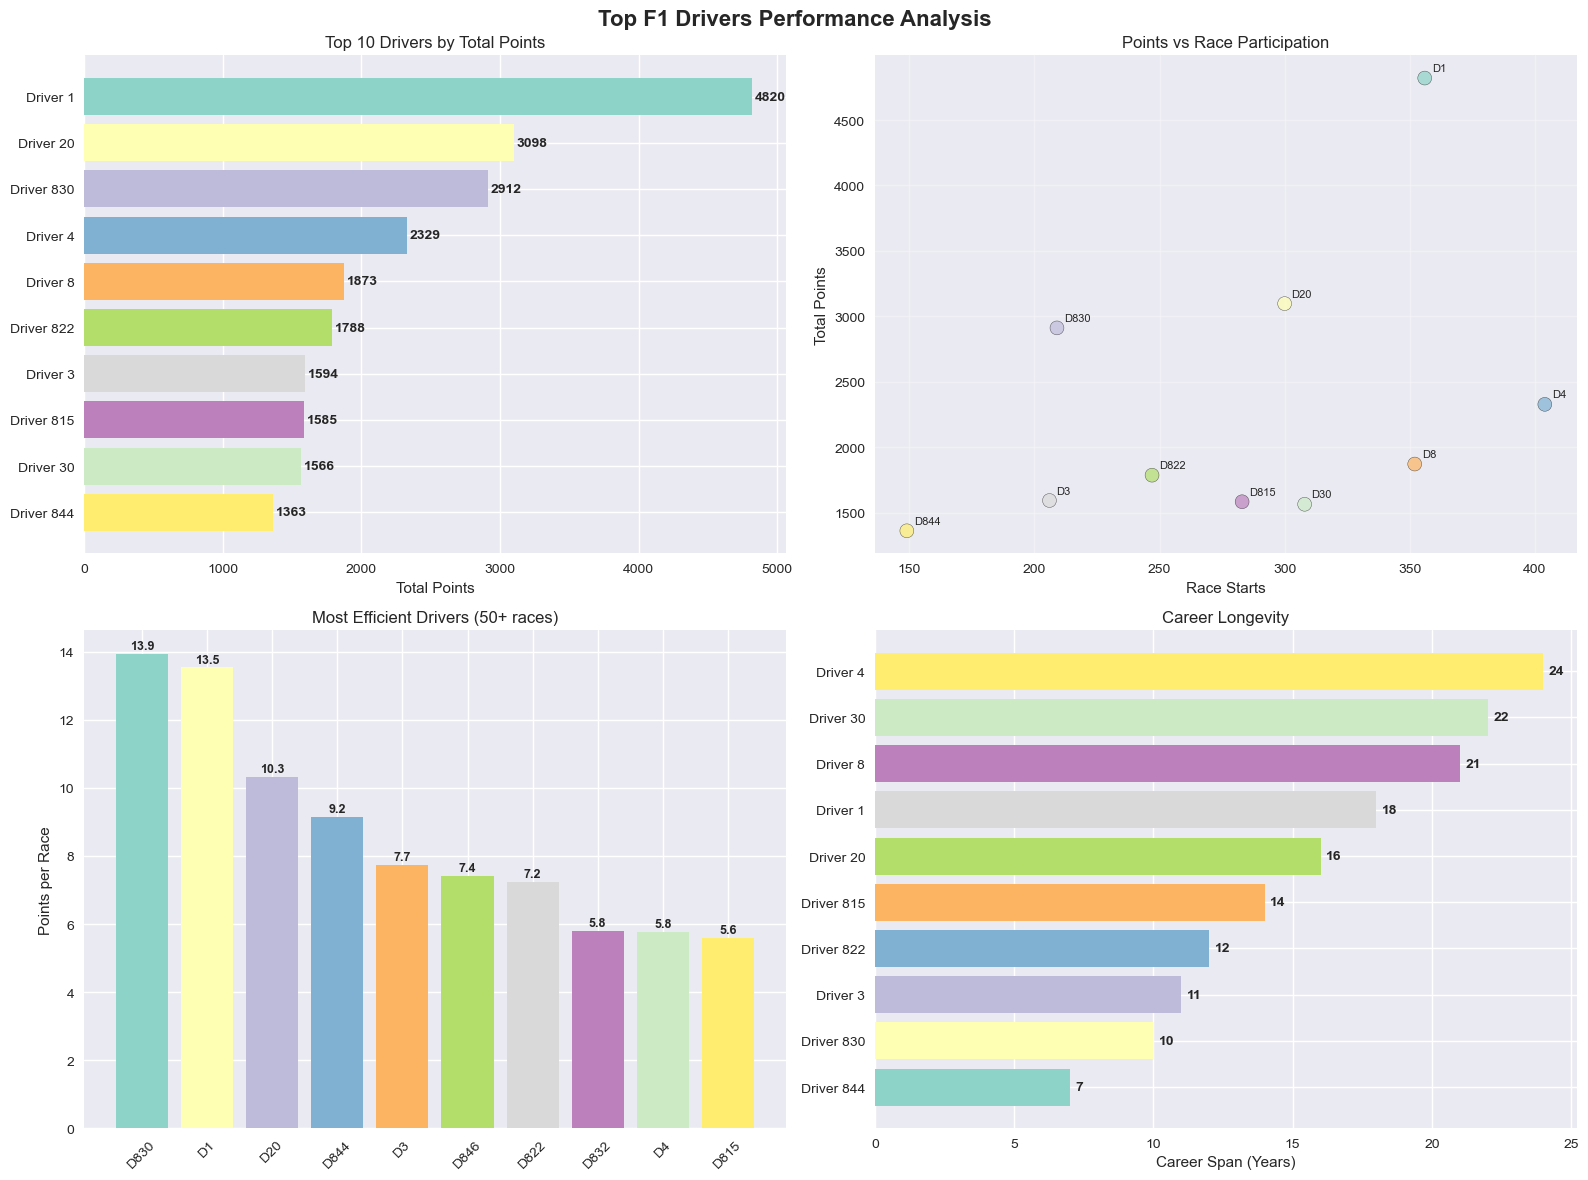

In [12]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Top F1 Drivers Performance Analysis', fontsize=16, fontweight='bold')

top_10 = top_drivers.head(10)

colors = plt.cm.Set3(np.linspace(0, 1, len(top_10)))
bars1 = ax1.barh(range(len(top_10)), top_10['total_points'], color=colors)
ax1.set_yticks(range(len(top_10)))
ax1.set_yticklabels([f'Driver {idx}' for idx in top_10.index])
ax1.set_xlabel('Total Points')
ax1.set_title('Top 10 Drivers by Total Points')
ax1.invert_yaxis()

for i, bar in enumerate(bars1):
    width = bar.get_width()
    ax1.text(width + 20, bar.get_y() + bar.get_height()/2, 
             f'{width:.0f}', ha='left', va='center', fontweight='bold')

ax2.scatter(top_10['race_starts'], top_10['total_points'], 
           c=colors, s=100, alpha=0.7, edgecolors='black')
ax2.set_xlabel('Race Starts')
ax2.set_ylabel('Total Points')
ax2.set_title('Points vs Race Participation')
ax2.grid(True, alpha=0.3)

for i, (idx, row) in enumerate(top_10.iterrows()):
    ax2.annotate(f'D{idx}', 
                (row['race_starts'], row['total_points']),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

efficiency_top = driver_points[driver_points['race_starts'] >= 50].sort_values('points_per_race', ascending=False).head(10)
bars3 = ax3.bar(range(len(efficiency_top)), efficiency_top['points_per_race'], color=colors)
ax3.set_xticks(range(len(efficiency_top)))
ax3.set_xticklabels([f'D{idx}' for idx in efficiency_top.index], rotation=45)
ax3.set_ylabel('Points per Race')
ax3.set_title('Most Efficient Drivers (50+ races)')

for i, bar in enumerate(bars3):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2, height + 0.05,
             f'{height:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

career_spans = top_10['career_span'].sort_values(ascending=True)
bars4 = ax4.barh(range(len(career_spans)), career_spans, color=colors)
ax4.set_yticks(range(len(career_spans)))
ax4.set_yticklabels([f'Driver {idx}' for idx in career_spans.index])
ax4.set_xlabel('Career Span (Years)')
ax4.set_title('Career Longevity')

for i, bar in enumerate(bars4):
    width = bar.get_width()
    ax4.text(width + 0.2, bar.get_y() + bar.get_height()/2,
             f'{width:.0f}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 6. Analysis 2: Team Efficiency Analysis

Let's examine which constructors have been most efficient at converting race participation into points.

In [13]:
print("ANALYSIS 2: TEAM EFFICIENCY ANALYSIS")
print("="*45)

constructor_stats = master_df.groupby('constructorId').agg({
    'points': 'sum',
    'raceId': 'count',
    'year': ['min', 'max'],
    'finished_race': 'sum'
}).round(1)

constructor_stats.columns = ['total_points', 'race_starts', 'first_year', 'last_year', 'finished_races']
constructor_stats['points_per_race'] = (constructor_stats['total_points'] / constructor_stats['race_starts']).round(2)
constructor_stats['finish_rate'] = (constructor_stats['finished_races'] / constructor_stats['race_starts'] * 100).round(1)
constructor_stats['career_span'] = constructor_stats['last_year'] - constructor_stats['first_year'] + 1

min_races = 100
qualified_constructors = constructor_stats[constructor_stats['race_starts'] >= min_races]
top_constructors = qualified_constructors.sort_values('points_per_race', ascending=False).head(15)

print(f"Top 15 most efficient constructors (minimum {min_races} race starts):")
print("-" * 90)
for i, (constructor_id, row) in enumerate(top_constructors.iterrows(), 1):
    print(f"{i:2d}. Constructor {constructor_id:3d}: {row['points_per_race']:4.2f} pts/race "
          f"({row['total_points']:6.0f} total pts, {row['race_starts']:3.0f} races, "
          f"{row['finish_rate']:4.1f}% finish rate)")

print(f"\nOverall constructor statistics:")
print(f"• Most efficient team: {top_constructors.iloc[0]['points_per_race']:.2f} points per race")
print(f"• Highest total points: {constructor_stats['total_points'].max():.0f} points")
print(f"• Best finish rate: {constructor_stats['finish_rate'].max():.1f}%")
print(f"• Most race starts: {constructor_stats['race_starts'].max():.0f} races")

ANALYSIS 2: TEAM EFFICIENCY ANALYSIS
Top 15 most efficient constructors (minimum 100 race starts):
------------------------------------------------------------------------------------------
 1. Constructor 131: 11.86 pts/race (  7731 total pts, 652 races, 81.9% finish rate)
 2. Constructor   9: 9.74 pts/race (  7673 total pts, 788 races, 72.1% finish rate)
 3. Constructor 208: 4.58 pts/race (   706 total pts, 154 races, 51.3% finish rate)
 4. Constructor   6: 4.55 pts/race ( 11091 total pts, 2439 races, 54.2% finish rate)
 5. Constructor   1: 3.65 pts/race (  7022 total pts, 1923 races, 51.5% finish rate)
 6. Constructor 214: 2.77 pts/race (   498 total pts, 180 races, 55.0% finish rate)
 7. Constructor  10: 2.59 pts/race (  1098 total pts, 424 races, 48.8% finish rate)
 8. Constructor 117: 2.58 pts/race (   492 total pts, 191 races, 55.5% finish rate)
 9. Constructor   4: 2.26 pts/race (  1777 total pts, 787 races, 40.2% finish rate)
10. Constructor   2: 2.20 pts/race (   308 total pt

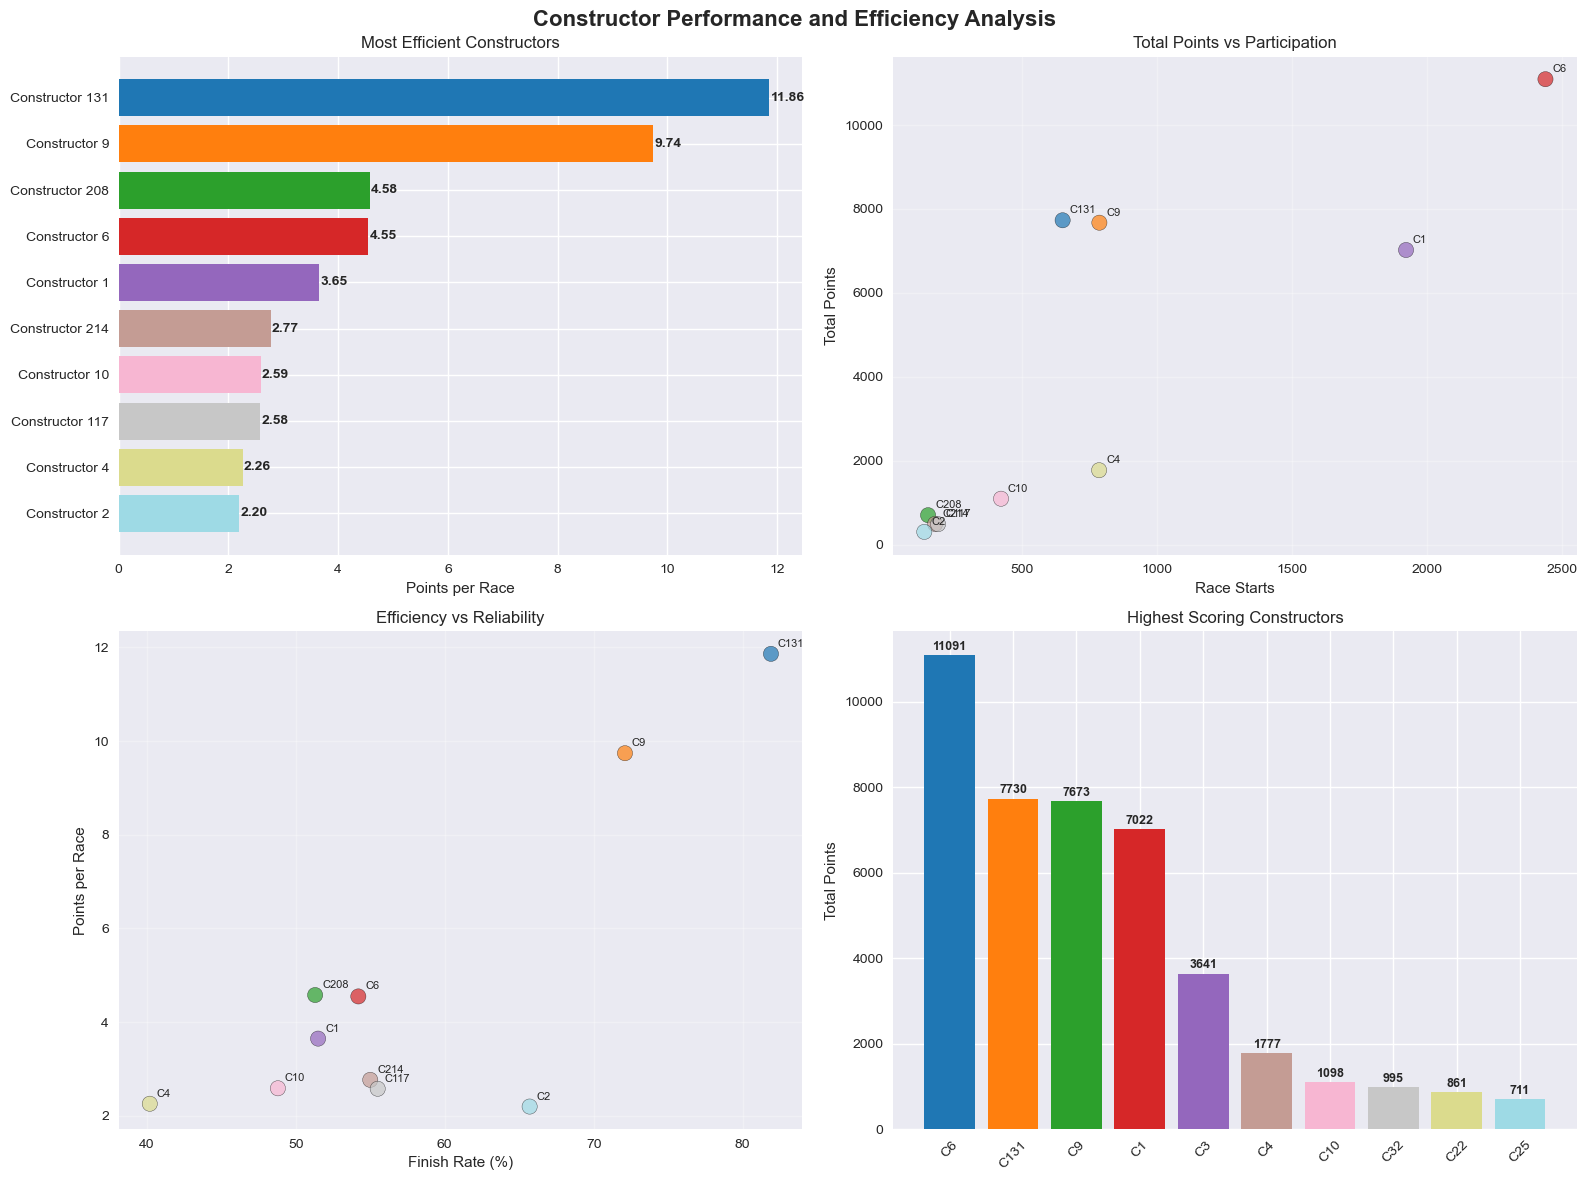

In [14]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Constructor Performance and Efficiency Analysis', fontsize=16, fontweight='bold')

top_10_constructors = top_constructors.head(10)
colors = plt.cm.tab20(np.linspace(0, 1, len(top_10_constructors)))

bars1 = ax1.barh(range(len(top_10_constructors)), top_10_constructors['points_per_race'], color=colors)
ax1.set_yticks(range(len(top_10_constructors)))
ax1.set_yticklabels([f'Constructor {idx}' for idx in top_10_constructors.index])
ax1.set_xlabel('Points per Race')
ax1.set_title('Most Efficient Constructors')
ax1.invert_yaxis()

for i, bar in enumerate(bars1):
    width = bar.get_width()
    ax1.text(width + 0.02, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}', ha='left', va='center', fontweight='bold')

ax2.scatter(top_10_constructors['race_starts'], top_10_constructors['total_points'],
           c=colors, s=120, alpha=0.7, edgecolors='black')
ax2.set_xlabel('Race Starts')
ax2.set_ylabel('Total Points')
ax2.set_title('Total Points vs Participation')
ax2.grid(True, alpha=0.3)

for i, (idx, row) in enumerate(top_10_constructors.iterrows()):
    ax2.annotate(f'C{idx}',
                (row['race_starts'], row['total_points']),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

ax3.scatter(top_10_constructors['finish_rate'], top_10_constructors['points_per_race'],
           c=colors, s=120, alpha=0.7, edgecolors='black')
ax3.set_xlabel('Finish Rate (%)')
ax3.set_ylabel('Points per Race')
ax3.set_title('Efficiency vs Reliability')
ax3.grid(True, alpha=0.3)

for i, (idx, row) in enumerate(top_10_constructors.iterrows()):
    ax3.annotate(f'C{idx}',
                (row['finish_rate'], row['points_per_race']),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

top_total = constructor_stats.sort_values('total_points', ascending=False).head(10)
bars4 = ax4.bar(range(len(top_total)), top_total['total_points'], color=colors)
ax4.set_xticks(range(len(top_total)))
ax4.set_xticklabels([f'C{idx}' for idx in top_total.index], rotation=45)
ax4.set_ylabel('Total Points')
ax4.set_title('Highest Scoring Constructors')

for i, bar in enumerate(bars4):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2, height + 50,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

## 7. Analysis 3: Reliability Analysis and DNF Trends

Let's examine how reliability has changed over the decades and identify the most common failure causes.

In [15]:
print("ANALYSIS 3: RELIABILITY ANALYSIS")
print("="*40)

yearly_reliability = master_df.groupby('year').agg({
    'finished_race': ['count', 'sum'],
    'raceId': 'nunique'
})

yearly_reliability.columns = ['total_results', 'finished_results', 'num_races']
yearly_reliability['dnf_rate'] = ((yearly_reliability['total_results'] - yearly_reliability['finished_results']) / yearly_reliability['total_results'] * 100).round(1)
yearly_reliability['finish_rate'] = (yearly_reliability['finished_results'] / yearly_reliability['total_results'] * 100).round(1)

decade_reliability = master_df.groupby('decade_label').agg({
    'finished_race': ['count', 'sum']
})
decade_reliability.columns = ['total_results', 'finished_results']
decade_reliability['dnf_rate'] = ((decade_reliability['total_results'] - decade_reliability['finished_results']) / decade_reliability['total_results'] * 100).round(1)

worst_years = yearly_reliability.sort_values('dnf_rate', ascending=False).head(10)
best_years = yearly_reliability.sort_values('dnf_rate', ascending=True).head(10)

print(f"Years with highest DNF rates:")
print("-" * 40)
for year, row in worst_years.iterrows():
    print(f"{year}: {row['dnf_rate']:4.1f}% DNF rate ({row['total_results']-row['finished_results']:.0f}/{row['total_results']:.0f} results)")

print(f"\nYears with lowest DNF rates:")
print("-" * 40)
for year, row in best_years.iterrows():
    print(f"{year}: {row['dnf_rate']:4.1f}% DNF rate ({row['total_results']-row['finished_results']:.0f}/{row['total_results']:.0f} results)")

print(f"\nDNF rates by decade:")
print("-" * 30)
for decade, row in decade_reliability.sort_index().iterrows():
    print(f"{decade}: {row['dnf_rate']:4.1f}% DNF rate")

print(f"\nOverall trends:")
print(f"• Worst DNF year: {worst_years.index[0]} ({worst_years.iloc[0]['dnf_rate']:.1f}%)")
print(f"• Best DNF year: {best_years.index[0]} ({best_years.iloc[0]['dnf_rate']:.1f}%)")
print(f"• Most reliable decade: {decade_reliability.idxmin()['dnf_rate']} ({decade_reliability.min()['dnf_rate']:.1f}%)")
print(f"• Least reliable decade: {decade_reliability.idxmax()['dnf_rate']} ({decade_reliability.max()['dnf_rate']:.1f}%)")

ANALYSIS 3: RELIABILITY ANALYSIS
Years with highest DNF rates:
----------------------------------------
1989: 89.5% DNF rate (555/620 results)
1950: 89.4% DNF rate (143/160 results)
1963: 89.0% DNF rate (226/254 results)
1986: 87.4% DNF rate (360/412 results)
1966: 87.3% DNF rate (145/166 results)
1982: 87.1% DNF rate (405/465 results)
1984: 87.0% DNF rate (374/430 results)
1987: 86.9% DNF rate (364/419 results)
1953: 86.6% DNF rate (213/246 results)
1964: 86.0% DNF rate (178/207 results)

Years with lowest DNF rates:
----------------------------------------
2023: 30.9% DNF rate (136/440 results)
2022: 36.6% DNF rate (161/440 results)
2009: 37.1% DNF rate (126/340 results)
2024: 40.1% DNF rate (192/479 results)
2013: 41.6% DNF rate (174/418 results)
2012: 43.1% DNF rate (207/480 results)
2020: 43.8% DNF rate (149/340 results)
2008: 47.3% DNF rate (174/368 results)
2021: 50.7% DNF rate (223/440 results)
2014: 50.9% DNF rate (207/407 results)

DNF rates by decade:
-----------------------

In [16]:
dnf_causes = master_df[~master_df['finished_race']]['dnf_reason'].value_counts().head(15)

print(f"\nMost common DNF causes:")
print("-" * 35)
total_dnfs = (~master_df['finished_race']).sum()
for cause, count in dnf_causes.items():
    percentage = count / total_dnfs * 100
    print(f"{cause:20s}: {count:5,} ({percentage:4.1f}%)")

dnf_by_decade = master_df[~master_df['finished_race']].groupby(['decade_label', 'dnf_reason']).size().unstack(fill_value=0)
dnf_percentages = dnf_by_decade.div(dnf_by_decade.sum(axis=1), axis=0) * 100

print(f"\nDNF cause evolution by decade (top causes):")
top_causes = ['Engine', 'Accident', 'Transmission', 'Gearbox', 'Collision']
available_causes = [cause for cause in top_causes if cause in dnf_percentages.columns]
print(f"Decades vs {', '.join(available_causes)} (% of DNFs):")
for decade in sorted(dnf_percentages.index):
    decade_data = [f"{dnf_percentages.loc[decade, cause]:4.1f}%" if cause in dnf_percentages.columns else "N/A" for cause in available_causes]
    print(f"{decade:6s}: {' | '.join(decade_data)}")


Most common DNF causes:
-----------------------------------
+1 Lap              : 4,037 (21.2%)
Engine              : 2,026 (10.6%)
+2 Laps             : 1,613 ( 8.5%)
Accident            : 1,062 ( 5.6%)
Did not qualify     : 1,025 ( 5.4%)
Collision           :   854 ( 4.5%)
Gearbox             :   810 ( 4.2%)
Spun off            :   795 ( 4.2%)
+3 Laps             :   731 ( 3.8%)
Suspension          :   431 ( 2.3%)
+4 Laps             :   405 ( 2.1%)
Did not prequalify  :   331 ( 1.7%)
Transmission        :   321 ( 1.7%)
Electrical          :   316 ( 1.7%)
Brakes              :   254 ( 1.3%)

DNF cause evolution by decade (top causes):
Decades vs Engine, Accident, Transmission, Gearbox, Collision (% of DNFs):
1950s : 14.2% |  7.9% |  4.1% |  3.2% |  0.3%
1960s : 12.7% |  6.8% |  1.7% |  5.0% |  0.1%
1970s : 12.0% | 10.9% |  1.8% |  3.4% |  1.5%
1980s : 12.3% |  4.3% |  1.8% |  4.1% |  3.8%
1990s : 12.4% |  1.5% |  1.8% |  7.4% |  7.2%
2000s :  8.9% |  5.6% |  1.3% |  4.0% |  7.8%
201

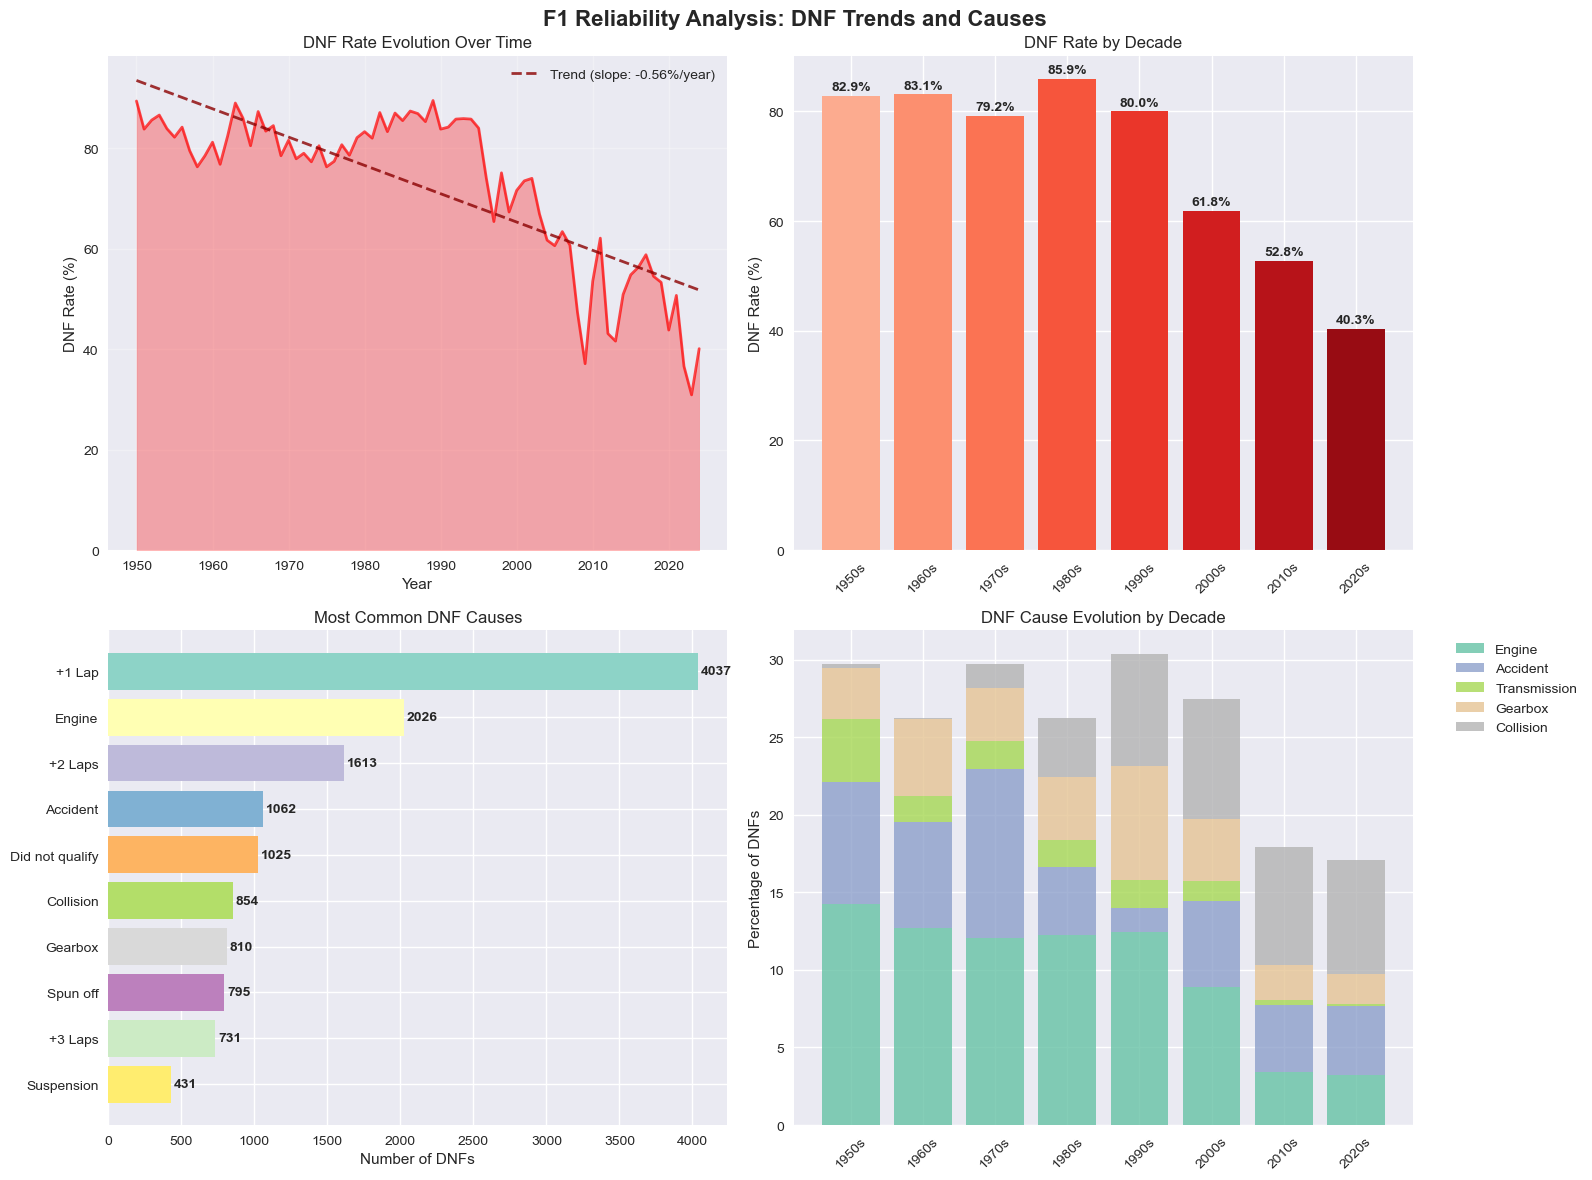

In [17]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('F1 Reliability Analysis: DNF Trends and Causes', fontsize=16, fontweight='bold')

years = yearly_reliability.index
dnf_rates = yearly_reliability['dnf_rate']
ax1.plot(years, dnf_rates, linewidth=2, color='red', alpha=0.7)
ax1.fill_between(years, dnf_rates, alpha=0.3, color='red')
ax1.set_xlabel('Year')
ax1.set_ylabel('DNF Rate (%)')
ax1.set_title('DNF Rate Evolution Over Time')
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, max(dnf_rates) * 1.1)

z = np.polyfit(years, dnf_rates, 1)
p = np.poly1d(z)
ax1.plot(years, p(years), "--", color='darkred', alpha=0.8, linewidth=2, label=f'Trend (slope: {z[0]:.2f}%/year)')
ax1.legend()

decade_dnf = decade_reliability['dnf_rate'].sort_index()
bars2 = ax2.bar(range(len(decade_dnf)), decade_dnf.values, 
                color=plt.cm.Reds(np.linspace(0.3, 0.9, len(decade_dnf))))
ax2.set_xticks(range(len(decade_dnf)))
ax2.set_xticklabels(decade_dnf.index, rotation=45)
ax2.set_ylabel('DNF Rate (%)')
ax2.set_title('DNF Rate by Decade')

for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height + 0.5,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

top_causes = dnf_causes.head(10)
bars3 = ax3.barh(range(len(top_causes)), top_causes.values, 
                 color=plt.cm.Set3(np.linspace(0, 1, len(top_causes))))
ax3.set_yticks(range(len(top_causes)))
ax3.set_yticklabels(top_causes.index)
ax3.set_xlabel('Number of DNFs')
ax3.set_title('Most Common DNF Causes')
ax3.invert_yaxis()

for i, bar in enumerate(bars3):
    width = bar.get_width()
    ax3.text(width + 20, bar.get_y() + bar.get_height()/2,
             f'{int(width)}', ha='left', va='center', fontweight='bold')

if len(available_causes) > 0 and len(dnf_percentages) > 0:
    cause_data = dnf_percentages[available_causes[:5]].fillna(0)
    decades = cause_data.index
    
    bottom = np.zeros(len(decades))
    colors = plt.cm.Set2(np.linspace(0, 1, len(cause_data.columns)))
    
    for i, cause in enumerate(cause_data.columns):
        ax4.bar(range(len(decades)), cause_data[cause], bottom=bottom, 
                label=cause, color=colors[i], alpha=0.8)
        bottom += cause_data[cause]
    
    ax4.set_xticks(range(len(decades)))
    ax4.set_xticklabels(decades, rotation=45)
    ax4.set_ylabel('Percentage of DNFs')
    ax4.set_title('DNF Cause Evolution by Decade')
    ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
else:
    ax4.text(0.5, 0.5, 'Insufficient data\nfor cause analysis', 
             ha='center', va='center', transform=ax4.transAxes, fontsize=12)
    ax4.set_title('DNF Cause Evolution by Decade')

plt.tight_layout()
plt.show()

## 8. Analysis 4: Performance Consistency - Position Changes

Let's analyze which drivers consistently gain or lose positions from their starting grid position.

In [18]:
print("ANALYSIS 4: PERFORMANCE CONSISTENCY ANALYSIS")
print("="*50)

position_analysis = master_df[master_df['positions_lost'].notna()]

driver_consistency = position_analysis.groupby('driverId').agg({
    'positions_lost': ['mean', 'std', 'count'],
    'grid': 'mean',
    'final_position': 'mean',
    'points': 'sum'
}).round(2)

driver_consistency.columns = ['avg_positions_lost', 'std_positions_lost', 'race_count', 'avg_grid', 'avg_finish', 'total_points']

min_races_threshold = 20
qualified_drivers = driver_consistency[driver_consistency['race_count'] >= min_races_threshold]

position_gainers = qualified_drivers.sort_values('avg_positions_lost', ascending=True).head(15)
position_losers = qualified_drivers.sort_values('avg_positions_lost', ascending=False).head(15)
most_consistent = qualified_drivers.sort_values('std_positions_lost', ascending=True).head(15)

print(f"Biggest position gainers (minimum {min_races_threshold} races):")
print("-" * 70)
for driver_id, row in position_gainers.iterrows():
    gain = -row['avg_positions_lost']
    print(f"Driver {driver_id:3d}: +{gain:4.2f} positions/race "
          f"(grid {row['avg_grid']:4.1f} → finish {row['avg_finish']:4.1f}, {row['race_count']:.0f} races)")

print(f"\nBiggest position losers:")
print("-" * 30)
for driver_id, row in position_losers.iterrows():
    loss = row['avg_positions_lost']
    print(f"Driver {driver_id:3d}: -{loss:4.2f} positions/race "
          f"(grid {row['avg_grid']:4.1f} → finish {row['avg_finish']:4.1f}, {row['race_count']:.0f} races)")

print(f"\nMost consistent performers (lowest std deviation):")
print("-" * 55)
for driver_id, row in most_consistent.iterrows():
    print(f"Driver {driver_id:3d}: {row['std_positions_lost']:4.2f} std dev "
          f"({row['avg_positions_lost']:+5.2f} avg change, {row['race_count']:.0f} races)")

print(f"\nKey insights:")
print(f"• Best average position gain: {-position_gainers.iloc[0]['avg_positions_lost']:+.2f} positions")
print(f"• Worst average position loss: {position_losers.iloc[0]['avg_positions_lost']:+.2f} positions")
print(f"• Most consistent driver std dev: {most_consistent.iloc[0]['std_positions_lost']:.2f}")
print(f"• Dataset includes {len(qualified_drivers)} drivers with {min_races_threshold}+ races")

ANALYSIS 4: PERFORMANCE CONSISTENCY ANALYSIS
Biggest position gainers (minimum 20 races):
----------------------------------------------------------------------
Driver 102: +0.30 positions/race (grid  2.9 → finish  3.1, 108 races)
Driver 373: +0.14 positions/race (grid  3.7 → finish  3.8, 50 races)
Driver 579: +-0.00 positions/race (grid  2.2 → finish  2.2, 44 races)
Driver 846: +-0.02 positions/race (grid  7.1 → finish  7.0, 119 races)
Driver 857: +-0.07 positions/race (grid  7.2 → finish  7.1, 43 races)
Driver 822: +-0.07 positions/race (grid  7.8 → finish  7.8, 217 races)
Driver 852: +-0.25 positions/race (grid 12.4 → finish 12.2, 71 races)
Driver 807: +-0.31 positions/race (grid 10.4 → finish 10.1, 184 races)
Driver   3: +-0.32 positions/race (grid  6.7 → finish  6.4, 177 races)
Driver 642: +-0.37 positions/race (grid  3.2 → finish  2.8, 27 races)
Driver 647: +-0.45 positions/race (grid  2.6 → finish  2.2, 22 races)
Driver 825: +-0.56 positions/race (grid 13.0 → finish 12.5, 149 ra

In [19]:
grid_analysis = position_analysis.groupby('grid').agg({
    'positions_lost': 'mean',
    'final_position': 'mean',
    'driverId': 'count'
}).round(2)

grid_analysis.columns = ['avg_positions_lost', 'avg_final_position', 'sample_size']
grid_analysis = grid_analysis[grid_analysis['sample_size'] >= 20]

print(f"\nStarting position analysis (positions 1-20):")
print("-" * 55)
print(f"{'Grid':<4} {'Avg Final':<10} {'Avg Change':<12} {'Sample Size':<12}")
print("-" * 50)
for grid_pos, row in grid_analysis.head(20).iterrows():
    change = -row['avg_positions_lost']
    print(f"{grid_pos:<4.0f} {row['avg_final_position']:<10.1f} {change:+8.2f}      {row['sample_size']:<8.0f}")

best_starting_positions = grid_analysis.sort_values('avg_positions_lost', ascending=True).head(5)
worst_starting_positions = grid_analysis.sort_values('avg_positions_lost', ascending=False).head(5)

print(f"\nBest starting positions (most likely to gain):")
for pos, row in best_starting_positions.iterrows():
    print(f"Position {pos:.0f}: {-row['avg_positions_lost']:+.2f} average change")

print(f"\nWorst starting positions (most likely to lose):")
for pos, row in worst_starting_positions.iterrows():
    print(f"Position {pos:.0f}: {row['avg_positions_lost']:+.2f} average change")


Starting position analysis (positions 1-20):
-------------------------------------------------------
Grid Avg Final  Avg Change   Sample Size 
--------------------------------------------------
1    2.4           +1.36      872     
2    3.2           +1.21      853     
3    3.7           +0.74      828     
4    4.5           +0.46      805     
5    5.1           +0.10      769     
6    5.7           -0.29      758     
7    6.4           -0.57      764     
8    7.1           -0.94      749     
9    7.2           -1.77      748     
10   7.9           -2.08      699     
11   8.4           -2.59      708     
12   8.7           -3.34      700     
13   9.4           -3.58      693     
14   10.2          -3.85      683     
15   10.3          -4.73      671     
16   10.5          -5.47      666     
17   11.2          -5.77      638     
18   11.9          -6.08      612     
19   12.3          -6.68      603     
20   12.4          -7.63      543     

Best starting positions 

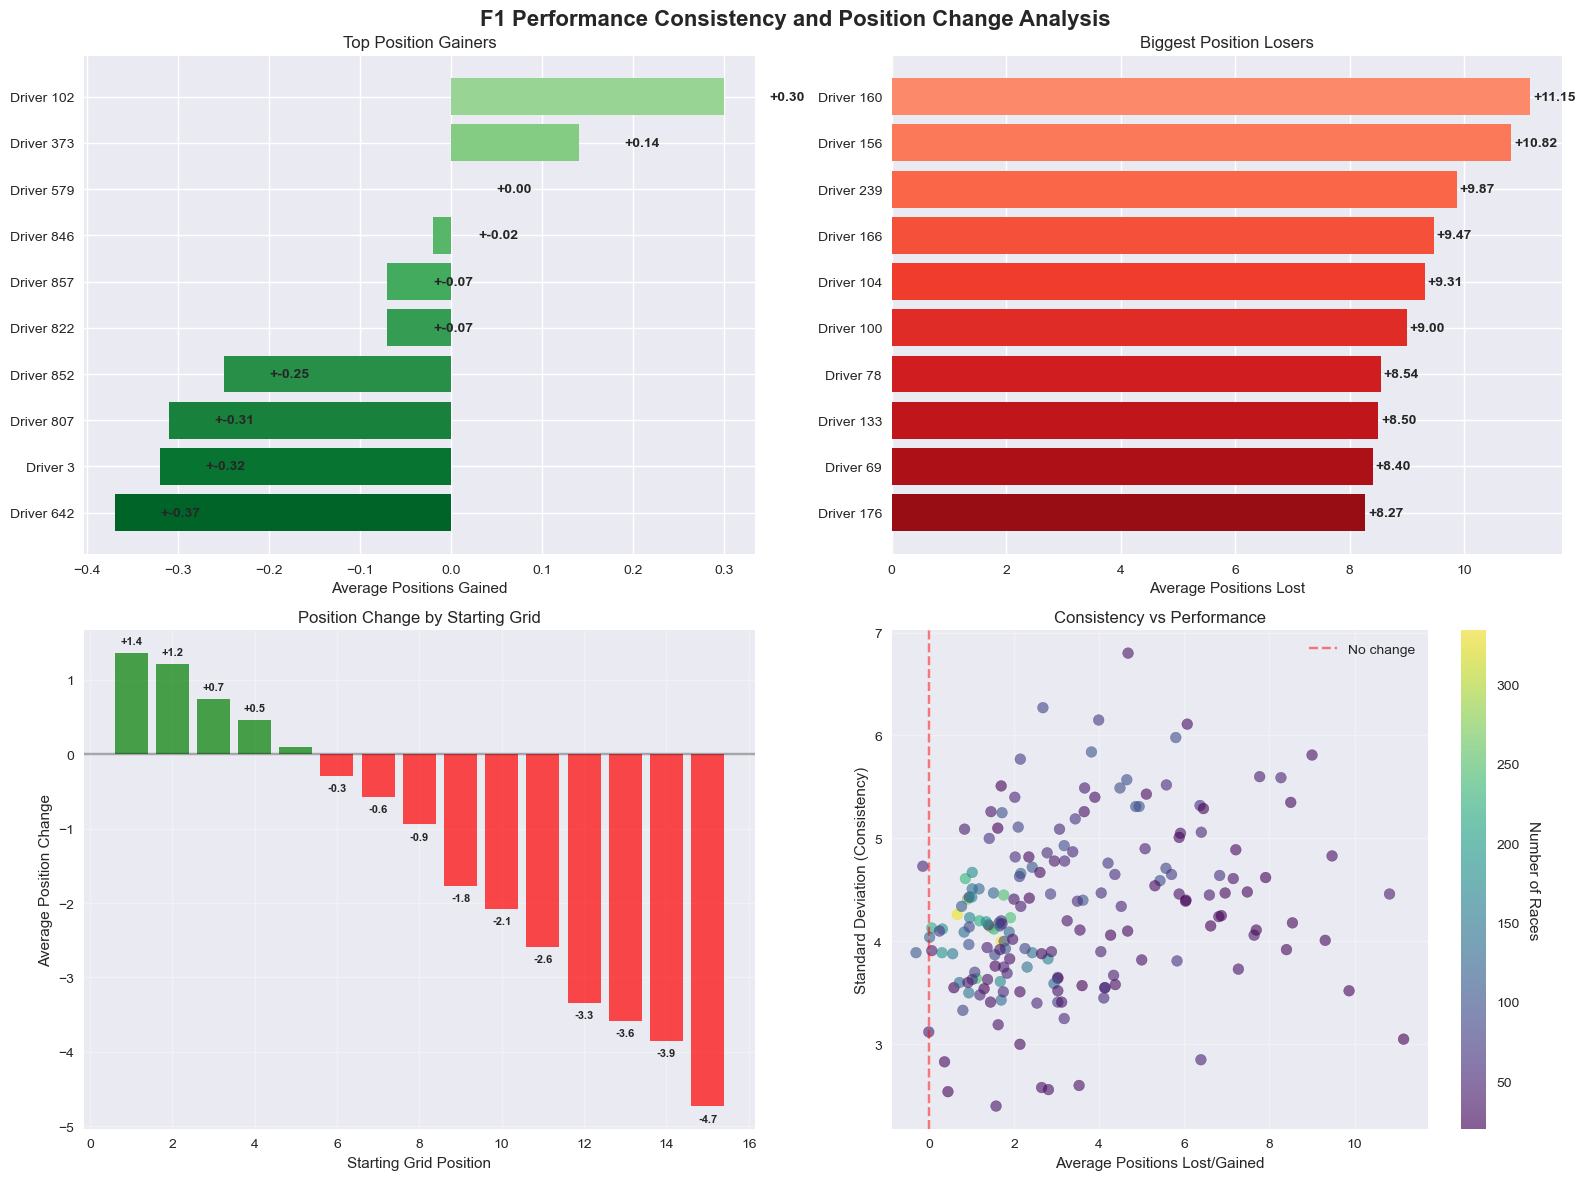

In [20]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('F1 Performance Consistency and Position Change Analysis', fontsize=16, fontweight='bold')

top_gainers = position_gainers.head(10)
gains = -top_gainers['avg_positions_lost']
colors_gain = plt.cm.Greens(np.linspace(0.4, 0.9, len(top_gainers)))
bars1 = ax1.barh(range(len(top_gainers)), gains, color=colors_gain)
ax1.set_yticks(range(len(top_gainers)))
ax1.set_yticklabels([f'Driver {idx}' for idx in top_gainers.index])
ax1.set_xlabel('Average Positions Gained')
ax1.set_title('Top Position Gainers')
ax1.invert_yaxis()

for i, bar in enumerate(bars1):
    width = bar.get_width()
    ax1.text(width + 0.05, bar.get_y() + bar.get_height()/2,
             f'+{width:.2f}', ha='left', va='center', fontweight='bold')

top_losers = position_losers.head(10)
losses = top_losers['avg_positions_lost']
colors_loss = plt.cm.Reds(np.linspace(0.4, 0.9, len(top_losers)))
bars2 = ax2.barh(range(len(top_losers)), losses, color=colors_loss)
ax2.set_yticks(range(len(top_losers)))
ax2.set_yticklabels([f'Driver {idx}' for idx in top_losers.index])
ax2.set_xlabel('Average Positions Lost')
ax2.set_title('Biggest Position Losers')
ax2.invert_yaxis()

for i, bar in enumerate(bars2):
    width = bar.get_width()
    ax2.text(width + 0.05, bar.get_y() + bar.get_height()/2,
             f'+{width:.2f}', ha='left', va='center', fontweight='bold')

grid_positions = grid_analysis.index[:15]
position_changes = -grid_analysis['avg_positions_lost'][:15]
colors_grid = ['green' if x > 0 else 'red' if x < 0 else 'gray' for x in position_changes]
bars3 = ax3.bar(grid_positions, position_changes, color=colors_grid, alpha=0.7)
ax3.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax3.set_xlabel('Starting Grid Position')
ax3.set_ylabel('Average Position Change')
ax3.set_title('Position Change by Starting Grid')
ax3.grid(True, alpha=0.3)

for i, bar in enumerate(bars3):
    height = bar.get_height()
    if abs(height) > 0.1:
        ax3.text(bar.get_x() + bar.get_width()/2, height + (0.1 if height > 0 else -0.1),
                 f'{height:+.1f}', ha='center', va='bottom' if height > 0 else 'top', 
                 fontweight='bold', fontsize=8)

ax4.scatter(qualified_drivers['avg_positions_lost'], qualified_drivers['std_positions_lost'],
           alpha=0.6, s=60, c=qualified_drivers['race_count'], cmap='viridis')
ax4.axvline(x=0, color='red', linestyle='--', alpha=0.5, label='No change')
ax4.set_xlabel('Average Positions Lost/Gained')
ax4.set_ylabel('Standard Deviation (Consistency)')
ax4.set_title('Consistency vs Performance')
ax4.grid(True, alpha=0.3)
ax4.legend()

cbar = plt.colorbar(ax4.collections[0], ax=ax4)
cbar.set_label('Number of Races', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()

## 9. Analysis 5: Era Comparison and Evolution

Let's compare performance metrics across different F1 eras and examine how the sport has evolved.

In [21]:
print("ANALYSIS 5: ERA COMPARISON AND EVOLUTION")
print("="*45)

era_stats = master_df.groupby('decade_label').agg({
    'points': ['sum', 'mean', 'std'],
    'raceId': ['count', 'nunique'],
    'driverId': 'nunique',
    'constructorId': 'nunique',
    'finished_race': ['sum', 'mean'],
    'final_position': 'mean',
    'grid': 'mean',
    'year': ['min', 'max']
}).round(2)

era_stats.columns = ['total_points', 'avg_points', 'std_points', 'total_results', 'num_races', 
                     'unique_drivers', 'unique_constructors', 'finished_count', 'finish_rate',
                     'avg_final_pos', 'avg_grid_pos', 'first_year', 'last_year']

era_stats['points_per_race'] = (era_stats['total_points'] / era_stats['num_races']).round(1)
era_stats['entries_per_race'] = (era_stats['total_results'] / era_stats['num_races']).round(1)
era_stats['dnf_rate'] = ((1 - era_stats['finish_rate']) * 100).round(1)

print(f"Performance evolution by decade:")
print("-" * 80)
print(f"{'Decade':<8} {'Races':<6} {'Drivers':<8} {'Teams':<6} {'Avg Pts':<8} {'DNF Rate':<9} {'Entries/Race':<12}")
print("-" * 80)
for decade, row in era_stats.sort_index().iterrows():
    print(f"{decade:<8} {row['num_races']:<6.0f} {row['unique_drivers']:<8.0f} {row['unique_constructors']:<6.0f} "
          f"{row['avg_points']:<8.2f} {row['dnf_rate']:<9.1f} {row['entries_per_race']:<12.1f}")

modern_eras = era_stats.loc[['2000s', '2010s', '2020s']] if '2020s' in era_stats.index else era_stats.loc[['2000s', '2010s']]
classic_eras = era_stats.loc[['1950s', '1960s', '1970s']]

print(f"\nEra comparisons:")
print(f"• Most competitive decade (most drivers): {era_stats.idxmax()['unique_drivers']} ({era_stats.max()['unique_drivers']:.0f} drivers)")
print(f"• Highest scoring decade: {era_stats.idxmax()['avg_points']} ({era_stats.max()['avg_points']:.2f} avg points)")
print(f"• Most reliable decade: {era_stats.idxmin()['dnf_rate']} ({era_stats.min()['dnf_rate']:.1f}% DNF rate)")
print(f"• Least reliable decade: {era_stats.idxmax()['dnf_rate']} ({era_stats.max()['dnf_rate']:.1f}% DNF rate)")
print(f"• Biggest grids: {era_stats.idxmax()['entries_per_race']} ({era_stats.max()['entries_per_race']:.1f} entries/race)")

if len(modern_eras) > 0 and len(classic_eras) > 0:
    modern_avg_points = modern_eras['avg_points'].mean()
    classic_avg_points = classic_eras['avg_points'].mean()
    modern_dnf = modern_eras['dnf_rate'].mean()
    classic_dnf = classic_eras['dnf_rate'].mean()
    
    print(f"\nModern vs Classic Era Comparison:")
    print(f"• Modern average points: {modern_avg_points:.2f} vs Classic: {classic_avg_points:.2f}")
    print(f"• Modern DNF rate: {modern_dnf:.1f}% vs Classic: {classic_dnf:.1f}%")
    print(f"• Reliability improvement: {classic_dnf - modern_dnf:.1f} percentage points")

ANALYSIS 5: ERA COMPARISON AND EVOLUTION
Performance evolution by decade:
--------------------------------------------------------------------------------
Decade   Races  Drivers  Teams  Avg Pts  DNF Rate  Entries/Race
--------------------------------------------------------------------------------
1950s    84     332      69     1.00     83.0      23.9        
1960s    100    219      71     1.17     83.0      21.1        
1970s    144    173      55     0.94     79.0      26.4        
1980s    156    115      31     0.86     86.0      28.9        
1990s    162    105      33     0.98     80.0      26.2        
2000s    174    71       23     1.67     62.0      20.9        
2010s    198    66       19     4.68     53.0      21.7        
2020s    107    36       14     5.07     40.0      20.0        

Era comparisons:
• Most competitive decade (most drivers): 1950s (332 drivers)
• Highest scoring decade: 2020s (5.07 avg points)
• Most reliable decade: 2020s (40.0% DNF rate)
• Least rel

In [22]:
decade_performance = []
for decade in sorted(master_df['decade_label'].unique()):
    decade_data = master_df[master_df['decade_label'] == decade]['points']
    decade_performance.append(decade_data.tolist())

competitiveness_over_time = master_df.groupby('year').agg({
    'driverId': 'nunique',
    'constructorId': 'nunique',
    'points': 'std'
}).fillna(0)

competitiveness_over_time.columns = ['drivers_per_year', 'constructors_per_year', 'points_std']

print(f"\nCompetitiveness trends:")
print("-" * 30)
recent_years = competitiveness_over_time.tail(10)
early_years = competitiveness_over_time.head(10)

print(f"Recent years (last 10):")
print(f"• Average drivers per year: {recent_years['drivers_per_year'].mean():.1f}")
print(f"• Average constructors per year: {recent_years['constructors_per_year'].mean():.1f}")
print(f"• Average points standard deviation: {recent_years['points_std'].mean():.2f}")

print(f"\nEarly years (first 10):")
print(f"• Average drivers per year: {early_years['drivers_per_year'].mean():.1f}")
print(f"• Average constructors per year: {early_years['constructors_per_year'].mean():.1f}")
print(f"• Average points standard deviation: {early_years['points_std'].mean():.2f}")


Competitiveness trends:
------------------------------
Recent years (last 10):
• Average drivers per year: 22.3
• Average constructors per year: 10.1
• Average points standard deviation: 7.20

Early years (first 10):
• Average drivers per year: 89.5
• Average constructors per year: 20.3
• Average points standard deviation: 2.16


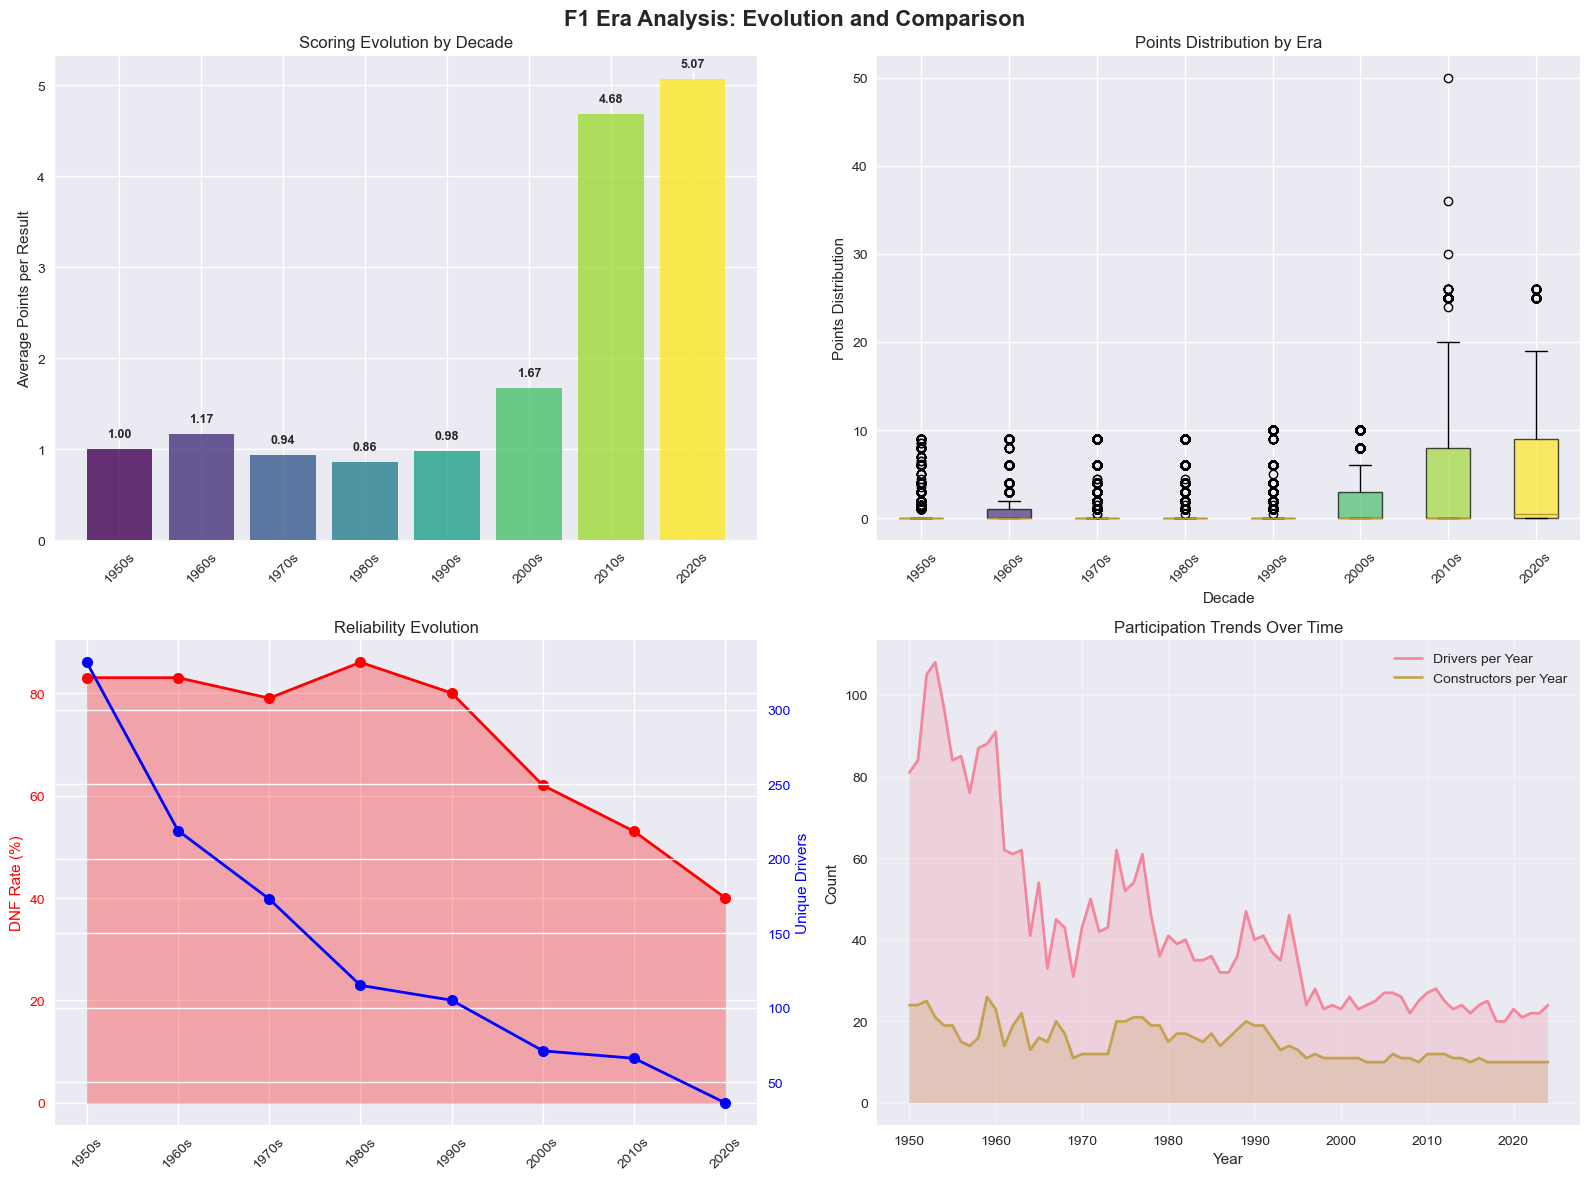

In [23]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('F1 Era Analysis: Evolution and Comparison', fontsize=16, fontweight='bold')

decades = era_stats.sort_index().index
avg_points = era_stats.sort_index()['avg_points']
colors_era = plt.cm.viridis(np.linspace(0, 1, len(decades)))

bars1 = ax1.bar(range(len(decades)), avg_points, color=colors_era, alpha=0.8)
ax1.set_xticks(range(len(decades)))
ax1.set_xticklabels(decades, rotation=45)
ax1.set_ylabel('Average Points per Result')
ax1.set_title('Scoring Evolution by Decade')

for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 0.1,
             f'{height:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

if len(decade_performance) > 0:
    bp = ax2.boxplot(decade_performance, labels=decades, patch_artist=True)
    for patch, color in zip(bp['boxes'], colors_era):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    ax2.set_xlabel('Decade')
    ax2.set_ylabel('Points Distribution')
    ax2.set_title('Points Distribution by Era')
    ax2.tick_params(axis='x', rotation=45)

dnf_rates_by_decade = era_stats.sort_index()['dnf_rate']
line1 = ax3.plot(range(len(decades)), dnf_rates_by_decade, 'ro-', linewidth=2, markersize=8, label='DNF Rate')
ax3.fill_between(range(len(decades)), dnf_rates_by_decade, alpha=0.3, color='red')
ax3.set_xticks(range(len(decades)))
ax3.set_xticklabels(decades, rotation=45)
ax3.set_ylabel('DNF Rate (%)', color='red')
ax3.set_title('Reliability Evolution')
ax3.tick_params(axis='y', labelcolor='red')

ax3_twin = ax3.twinx()
drivers_by_decade = era_stats.sort_index()['unique_drivers']
ax3_twin.plot(range(len(decades)), drivers_by_decade, 'bo-', linewidth=2, markersize=8, label='Unique Drivers')
ax3_twin.set_ylabel('Unique Drivers', color='blue')
ax3_twin.tick_params(axis='y', labelcolor='blue')

years = competitiveness_over_time.index
drivers_trend = competitiveness_over_time['drivers_per_year']
constructors_trend = competitiveness_over_time['constructors_per_year']

ax4.plot(years, drivers_trend, linewidth=2, label='Drivers per Year', alpha=0.8)
ax4.plot(years, constructors_trend, linewidth=2, label='Constructors per Year', alpha=0.8)
ax4.set_xlabel('Year')
ax4.set_ylabel('Count')
ax4.set_title('Participation Trends Over Time')
ax4.legend()
ax4.grid(True, alpha=0.3)

ax4.fill_between(years, drivers_trend, alpha=0.2)
ax4.fill_between(years, constructors_trend, alpha=0.2)

plt.tight_layout()
plt.show()

## 10. Statistical Analysis and Correlations

Let's perform some statistical tests to validate our findings and identify significant correlations.

In [24]:
print("STATISTICAL ANALYSIS")
print("="*30)

correlation_data = master_df[['grid', 'final_position', 'points', 'year']].dropna()

if len(correlation_data) > 0:
    correlation_matrix = correlation_data.corr()
    print(f"Correlation Matrix:")
    print(correlation_matrix.round(3))
    
    grid_finish_corr = correlation_matrix.loc['grid', 'final_position']
    print(f"\nKey correlations:")
    print(f"• Grid position vs Final position: {grid_finish_corr:.3f}")
    print(f"• Grid position vs Points: {correlation_matrix.loc['grid', 'points']:.3f}")
    print(f"• Final position vs Points: {correlation_matrix.loc['final_position', 'points']:.3f}")
    
    if abs(grid_finish_corr) > 0.5:
        print(f"• Strong correlation between starting and finishing positions!")
    elif abs(grid_finish_corr) > 0.3:
        print(f"• Moderate correlation between starting and finishing positions")
    else:
        print(f"• Weak correlation between starting and finishing positions")

outlier_analysis = master_df[master_df['positions_lost'].notna()]
if len(outlier_analysis) > 0:
    Q1 = outlier_analysis['positions_lost'].quantile(0.25)
    Q3 = outlier_analysis['positions_lost'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = outlier_analysis[(outlier_analysis['positions_lost'] < lower_bound) | 
                               (outlier_analysis['positions_lost'] > upper_bound)]
    
    print(f"\nOutlier Analysis (Position Changes):")
    print(f"• Total race results analyzed: {len(outlier_analysis):,}")
    print(f"• Outlier performances: {len(outliers):,} ({len(outliers)/len(outlier_analysis)*100:.1f}%)")
    print(f"• IQR bounds: {lower_bound:.1f} to {upper_bound:.1f} position changes")
    
    if len(outliers) > 0:
        biggest_gains = outliers.nsmallest(5, 'positions_lost')
        biggest_losses = outliers.nlargest(5, 'positions_lost')
        
        print(f"\nBiggest single-race position gains:")
        for _, race in biggest_gains.iterrows():
            gain = -race['positions_lost']
            print(f"• Driver {race['driverId']} in {race['year']}: +{gain:.0f} positions (grid {race['grid']:.0f} → P{race['final_position']:.0f})")
        
        print(f"\nBiggest single-race position losses:")
        for _, race in biggest_losses.iterrows():
            loss = race['positions_lost']
            print(f"• Driver {race['driverId']} in {race['year']}: -{loss:.0f} positions (grid {race['grid']:.0f} → P{race['final_position']:.0f})")

STATISTICAL ANALYSIS
Correlation Matrix:
                 grid  final_position  points   year
grid            1.000           0.638  -0.552 -0.055
final_position  0.638           1.000  -0.651  0.203
points         -0.552          -0.651   1.000  0.257
year           -0.055           0.203   0.257  1.000

Key correlations:
• Grid position vs Final position: 0.638
• Grid position vs Points: -0.552
• Final position vs Points: -0.651
• Strong correlation between starting and finishing positions!

Outlier Analysis (Position Changes):
• Total race results analyzed: 15,748
• Outlier performances: 377 (2.4%)
• IQR bounds: -9.0 to 15.0 position changes

Biggest single-race position gains:
• Driver 537 in 1960: +27 positions (grid 4 → P31)
• Driver 536 in 1960: +25 positions (grid 5 → P30)
• Driver 527 in 1960: +20 positions (grid 1 → P21)
• Driver 846 in 2024: +18 positions (grid 2 → P20)
• Driver 102 in 1990: +17 positions (grid 3 → P20)

Biggest single-race position losses:
• Driver 509 in 1

In [25]:
from scipy.stats import chi2_contingency, f_oneway

decade_groups = []
decade_names = []
for decade in sorted(master_df['decade_label'].unique()):
    decade_points = master_df[master_df['decade_label'] == decade]['points'].dropna()
    if len(decade_points) > 10:
        decade_groups.append(decade_points)
        decade_names.append(decade)

if len(decade_groups) > 2:
    try:
        f_stat, p_value = f_oneway(*decade_groups)
        print(f"\nANOVA Test - Performance Differences Between Decades:")
        print(f"• F-statistic: {f_stat:.3f}")
        print(f"• P-value: {p_value:.6f}")
        if p_value < 0.001:
            print(f"• Result: Highly significant differences between decades (p < 0.001)")
        elif p_value < 0.05:
            print(f"• Result: Significant differences between decades (p < 0.05)")
        else:
            print(f"• Result: No significant differences between decades (p ≥ 0.05)")
    except Exception as e:
        print(f"\nANOVA test could not be performed: {e}")

dnf_contingency = pd.crosstab(master_df['decade_label'], master_df['finished_race'])
if dnf_contingency.shape[0] > 1 and dnf_contingency.shape[1] > 1:
    try:
        chi2, p_chi2, dof, expected = chi2_contingency(dnf_contingency)
        print(f"\nChi-Square Test - DNF Rates Across Decades:")
        print(f"• Chi-square statistic: {chi2:.3f}")
        print(f"• P-value: {p_chi2:.6f}")
        print(f"• Degrees of freedom: {dof}")
        if p_chi2 < 0.001:
            print(f"• Result: Highly significant differences in DNF rates across decades")
        elif p_chi2 < 0.05:
            print(f"• Result: Significant differences in DNF rates across decades")
        else:
            print(f"• Result: No significant differences in DNF rates across decades")
    except Exception as e:
        print(f"\nChi-square test could not be performed: {e}")

print(f"\nData Quality Summary:")
print(f"• Total race results: {len(master_df):,}")
print(f"• Complete position data: {master_df['final_position'].notna().sum():,} ({master_df['final_position'].notna().mean()*100:.1f}%)")
print(f"• Complete grid data: {master_df['grid'].notna().sum():,} ({master_df['grid'].notna().mean()*100:.1f}%)")
print(f"• Position change calculations: {master_df['positions_lost'].notna().sum():,}")
print(f"• Years covered: {master_df['year'].min()} to {master_df['year'].max()}")
print(f"• Decades analyzed: {len(master_df['decade_label'].unique())}")


ANOVA Test - Performance Differences Between Decades:
• F-statistic: 607.141
• P-value: 0.000000
• Result: Highly significant differences between decades (p < 0.001)

Chi-Square Test - DNF Rates Across Decades:
• Chi-square statistic: 2902.078
• P-value: 0.000000
• Degrees of freedom: 7
• Result: Highly significant differences in DNF rates across decades

Data Quality Summary:
• Total race results: 26,759
• Complete position data: 15,808 (59.1%)
• Complete grid data: 26,759 (100.0%)
• Position change calculations: 15,748
• Years covered: 1950 to 2024
• Decades analyzed: 8


## 11. Executive Summary and Key Findings

### Major Insights from F1 Performance Analysis (1950-2024)

In [26]:
print("EXECUTIVE SUMMARY - KEY FINDINGS")
print("="*50)

def generate_summary_stats():
    stats = {}
    
    stats['total_results'] = len(master_df)
    stats['year_span'] = f"{master_df['year'].min()}-{master_df['year'].max()}"
    stats['total_drivers'] = master_df['driverId'].nunique()
    stats['total_constructors'] = master_df['constructorId'].nunique()
    stats['total_races'] = master_df['raceId'].nunique()
    
    stats['overall_dnf_rate'] = (1 - master_df['finished_race'].mean()) * 100
    
    if len(driver_points) > 0:
        stats['top_driver_points'] = driver_points.iloc[0]['total_points']
        stats['top_driver_id'] = driver_points.index[0]
        stats['most_races'] = driver_points['race_starts'].max()
        stats['best_efficiency'] = driver_points[driver_points['race_starts'] >= 50]['points_per_race'].max()
    
    if len(constructor_stats) > 0:
        qualified_constructors = constructor_stats[constructor_stats['race_starts'] >= 100]
        if len(qualified_constructors) > 0:
            stats['most_efficient_constructor'] = qualified_constructors['points_per_race'].max()
            stats['most_efficient_constructor_id'] = qualified_constructors.idxmax()['points_per_race']
    
    if len(yearly_reliability) > 0:
        stats['worst_dnf_year'] = yearly_reliability.idxmax()['dnf_rate']
        stats['worst_dnf_rate'] = yearly_reliability.max()['dnf_rate']
        stats['best_dnf_year'] = yearly_reliability.idxmin()['dnf_rate']
        stats['best_dnf_rate'] = yearly_reliability.min()['dnf_rate']
    
    if len(era_stats) > 0:
        stats['most_reliable_decade'] = era_stats.idxmin()['dnf_rate']
        stats['least_reliable_decade'] = era_stats.idxmax()['dnf_rate']
        stats['highest_scoring_decade'] = era_stats.idxmax()['avg_points']
    
    return stats

summary_stats = generate_summary_stats()

print(f"DATASET OVERVIEW")
print(f"-" * 25)
print(f"• Analysis period: {summary_stats['year_span']}")
print(f"• Total race results analyzed: {summary_stats['total_results']:,}")
print(f"• Unique drivers: {summary_stats['total_drivers']:,}")
print(f"• Unique constructors: {summary_stats['total_constructors']:,}")
print(f"• Total races: {summary_stats['total_races']:,}")

print(f"\nTOP PERFORMANCE INSIGHTS")
print(f"-" * 35)
if 'top_driver_points' in summary_stats:
    print(f"• Highest scoring driver: Driver {summary_stats['top_driver_id']} ({summary_stats['top_driver_points']:.0f} points)")
    print(f"• Most race starts: {summary_stats['most_races']:.0f} races")
    print(f"• Best efficiency (50+ races): {summary_stats['best_efficiency']:.2f} points/race")

if 'most_efficient_constructor' in summary_stats:
    print(f"• Most efficient constructor: Constructor {summary_stats['most_efficient_constructor_id']} ({summary_stats['most_efficient_constructor']:.2f} pts/race)")

print(f"\nRELIABILITY EVOLUTION")
print(f"-" * 30)
print(f"• Overall DNF rate: {summary_stats['overall_dnf_rate']:.1f}%")
if 'worst_dnf_year' in summary_stats:
    print(f"• Worst reliability year: {summary_stats['worst_dnf_year']} ({summary_stats['worst_dnf_rate']:.1f}% DNF)")
    print(f"• Best reliability year: {summary_stats['best_dnf_year']} ({summary_stats['best_dnf_rate']:.1f}% DNF)")

if 'most_reliable_decade' in summary_stats:
    print(f"• Most reliable decade: {summary_stats['most_reliable_decade']}")
    print(f"• Least reliable decade: {summary_stats['least_reliable_decade']}")

print(f"\nERA ANALYSIS")
print(f"-" * 20)
if 'highest_scoring_decade' in summary_stats:
    print(f"• Highest scoring decade: {summary_stats['highest_scoring_decade']}")

if len(dnf_causes) > 0:
    print(f"• Most common DNF cause: {dnf_causes.index[0]} ({dnf_causes.iloc[0]:,} occurrences)")

if len(correlation_data) > 0:
    grid_finish_corr = correlation_data['grid'].corr(correlation_data['final_position'])
    print(f"• Grid-to-finish correlation: {grid_finish_corr:.3f} {'(strong)' if abs(grid_finish_corr) > 0.5 else '(moderate)' if abs(grid_finish_corr) > 0.3 else '(weak)'}")

EXECUTIVE SUMMARY - KEY FINDINGS
DATASET OVERVIEW
-------------------------
• Analysis period: 1950-2024
• Total race results analyzed: 26,759
• Unique drivers: 861
• Unique constructors: 211
• Total races: 1,125

TOP PERFORMANCE INSIGHTS
-----------------------------------
• Highest scoring driver: Driver 1 (4820 points)
• Most race starts: 404 races
• Best efficiency (50+ races): 13.94 points/race
• Most efficient constructor: Constructor 131 (11.86 pts/race)

RELIABILITY EVOLUTION
------------------------------
• Overall DNF rate: 71.3%
• Worst reliability year: 1989 (89.5% DNF)
• Best reliability year: 2023 (30.9% DNF)
• Most reliable decade: 2020s
• Least reliable decade: 1980s

ERA ANALYSIS
--------------------
• Highest scoring decade: 2020s
• Most common DNF cause: +1 Lap (4,037 occurrences)
• Grid-to-finish correlation: 0.638 (strong)


## 12. Technical Appendix

### Data Dictionary and Methodology

**Key Calculated Fields:**
- `final_position`: Numeric conversion of positionText (handles DNF codes)
- `finished_race`: Boolean indicating race completion (statusId = 1)
- `positions_lost`: Grid position - Final position (negative = positions gained)
- `decade_label`: Decade grouping (1950s, 1960s, etc.)
- `dnf_reason`: Cleaned status descriptions

**Analysis Methodology:**
- Minimum race thresholds applied for driver/constructor comparisons
- Statistical outliers identified using IQR method (1.5 × IQR)
- ANOVA and Chi-square tests used for significance testing
- Correlation analysis performed on complete data only

**Limitations:**
- Driver and constructor names not available (using IDs)
- Point system changes across eras not normalized
- Weather and track conditions not included
- Some historical data may be incomplete

**Data Sources:**
- results.csv: 26,759 race results
- races.csv: 1,125 race records  
- status.csv: 139 status definitions

